<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
        Project - 3rd Phase
        <br />
        Image Colorization using Autoencoder
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99101416
            <br />
            Name = Mohammad reza   
            <br />
            Last_Name = Hajibabaei
        </div>
        <div class="column">
        <br />
            student_number = 400102222
            <br />
            Name = Amirreza
            <br />
            Last_Name =Velae
        </div>
    </font>
    </div>


1. Download the "landscape image colorization" dataset and slice it to `train_set`, `validation_set` and `test_set`.
2. Design and train an AutoEncoder using `PyTorch` (not `TensorFlow`) on the dataset to colorize grayscale images
3. plot learning curve and visualize grayscale images of test set, their corresponding color images and their colorized versions side by side.

# Import Necessary Libraries

In [24]:
import numpy as np 
import pandas as pd 
import os
import re
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision import datasets,transforms
from typing import Dict
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

# Load Dataset and Prepare It

In [25]:
#reading the address of the image folder
base_directory = 'landscape Images'
color_folder = os.path.join(base_directory, 'color')
gray_folder = os.path.join(base_directory, 'gray')
#putting the address into the panda frame
data = []
for image in os.listdir(color_folder):
    color_path = os.path.join(color_folder, image)
    gray_path = os.path.join(gray_folder, image)
    data.append({"color": color_path, "gray": gray_path})
data = pd.DataFrame(data)
data.head()

,color,gray
0,landscape Images\color\0.jpg,landscape Images\gray\0.jpg
1,landscape Images\color\1.jpg,landscape Images\gray\1.jpg
2,landscape Images\color\10.jpg,landscape Images\gray\10.jpg
3,landscape Images\color\100.jpg,landscape Images\gray\100.jpg
4,landscape Images\color\1000.jpg,landscape Images\gray\1000.jpg


In [26]:
#split the data to test_set and train_set
train_set, test_set = train_test_split(data, test_size=0.8)
print(len(train_set))
print(len(test_set))
color_trainData = []
gray_trainData = []
#converting addresses of images to dataLoader
for color , gray in zip(train_set.color,train_set.gray):
    
    colorResize = cv2.resize(cv2.cvtColor(cv2.imread(color),cv2.COLOR_BGR2RGB),(150,150))
    grayResize = cv2.resize(cv2.cvtColor(cv2.imread(gray),cv2.COLOR_BGR2RGB),(150,150))
    
    color_floatType = colorResize.astype(np.float32) / 255.
    gray_floatType = grayResize.astype(np.float32) / 255.
    
    color_trainData.append(np.transpose(img_to_array(color_floatType), (2, 0, 1)))
    gray_trainData.append(np.transpose(img_to_array(gray_floatType), (2, 0, 1)))
    
    
color_trainData = np.array(color_trainData)
gray_trainData = np.array(gray_trainData)

train_data = TensorDataset(torch.Tensor(gray_trainData), torch.Tensor(color_trainData))
train_data = DataLoader(train_data, batch_size=4, shuffle=True)

1425
5704


In [27]:
color_testData = []
gray_testData = []
#also for test_set
for color , gray in zip(test_set.color,test_set.gray):
    
    colorResize = cv2.resize(cv2.cvtColor(cv2.imread(color),cv2.COLOR_BGR2RGB),(150,150))
    grayResize = cv2.resize(cv2.cvtColor(cv2.imread(gray),cv2.COLOR_BGR2RGB),(150,150))
    
    color_floatType = colorResize.astype(np.float32) / 255.
    gray_floatType = grayResize.astype(np.float32) / 255.
    
    color_testData.append(np.transpose(img_to_array(color_floatType), (2, 0, 1)))
    gray_testData.append(np.transpose(img_to_array(gray_floatType), (2, 0, 1)))
    
    
color_testData = np.array(color_testData)
gray_testData = np.array(gray_testData)

test_data = TensorDataset(torch.Tensor(gray_testData), torch.Tensor(color_testData))
test_data = DataLoader(test_data, batch_size=4, shuffle=True)

# Define Your Model

In [28]:
#defining the neural network
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
#         self.conv1=nn.Conv2d(3, 64, 3, padding='same')
#         self.conv2=nn.Conv2d(64, 64, 3, padding='same')
#         self.conv3=nn.Conv2d(64, 128, 3, padding='same')
#         self.conv4=nn.Conv2d(128, 128, 3, padding='same')
#         self.conv5=nn.Conv2d(128, 256, 3, padding='same')
        
#         self.conv1_1=nn.Conv2d(3, 64, 3, padding='same')
#         self.conv2_1=nn.Conv2d(64, 64, 3, padding='same')
#         self.conv3_1=nn.Conv2d(64, 128, 3, padding='same')
#         self.conv4_1=nn.Conv2d(128, 128, 3, padding='same')
#         self.conv5_1=nn.Conv2d(128, 256, 3, padding='same')
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, padding='same'),
        )    
        self.decoder = nn.Sequential(
            nn.Conv2d(256, 128, 3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(128, 64, 3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(64, 3, 3, padding='same'),
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = Autoencoder()


# Fit The Model

Also Define optimizer, Criterion and other parameters 

In [29]:
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

is running
is running
is running
is running
is running
is running
is running
is running
is running
is running


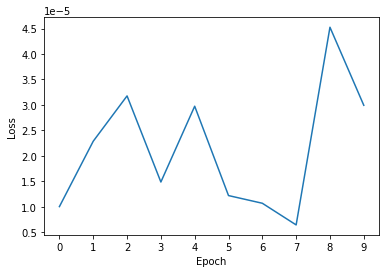

In [30]:
epoch_num = 10
loss_total = []
#train the model and calculating the loss
for epoch in range(epoch_num):
    lossOfEpoch = 0.0
    for i, data in enumerate(train_data, 0):
        grayImage, colorImage = data
        reconstructedImage= autoencoder(grayImage)
        #calculate the loss and optimize the model parameters
        loss = criterion(reconstructedImage, colorImage)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossOfEpoch =+ loss.item()
    loss_total.append(lossOfEpoch / i)
    print('is running')
plt.plot(loss_total)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(10))
plt.show()

# Plot The Results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


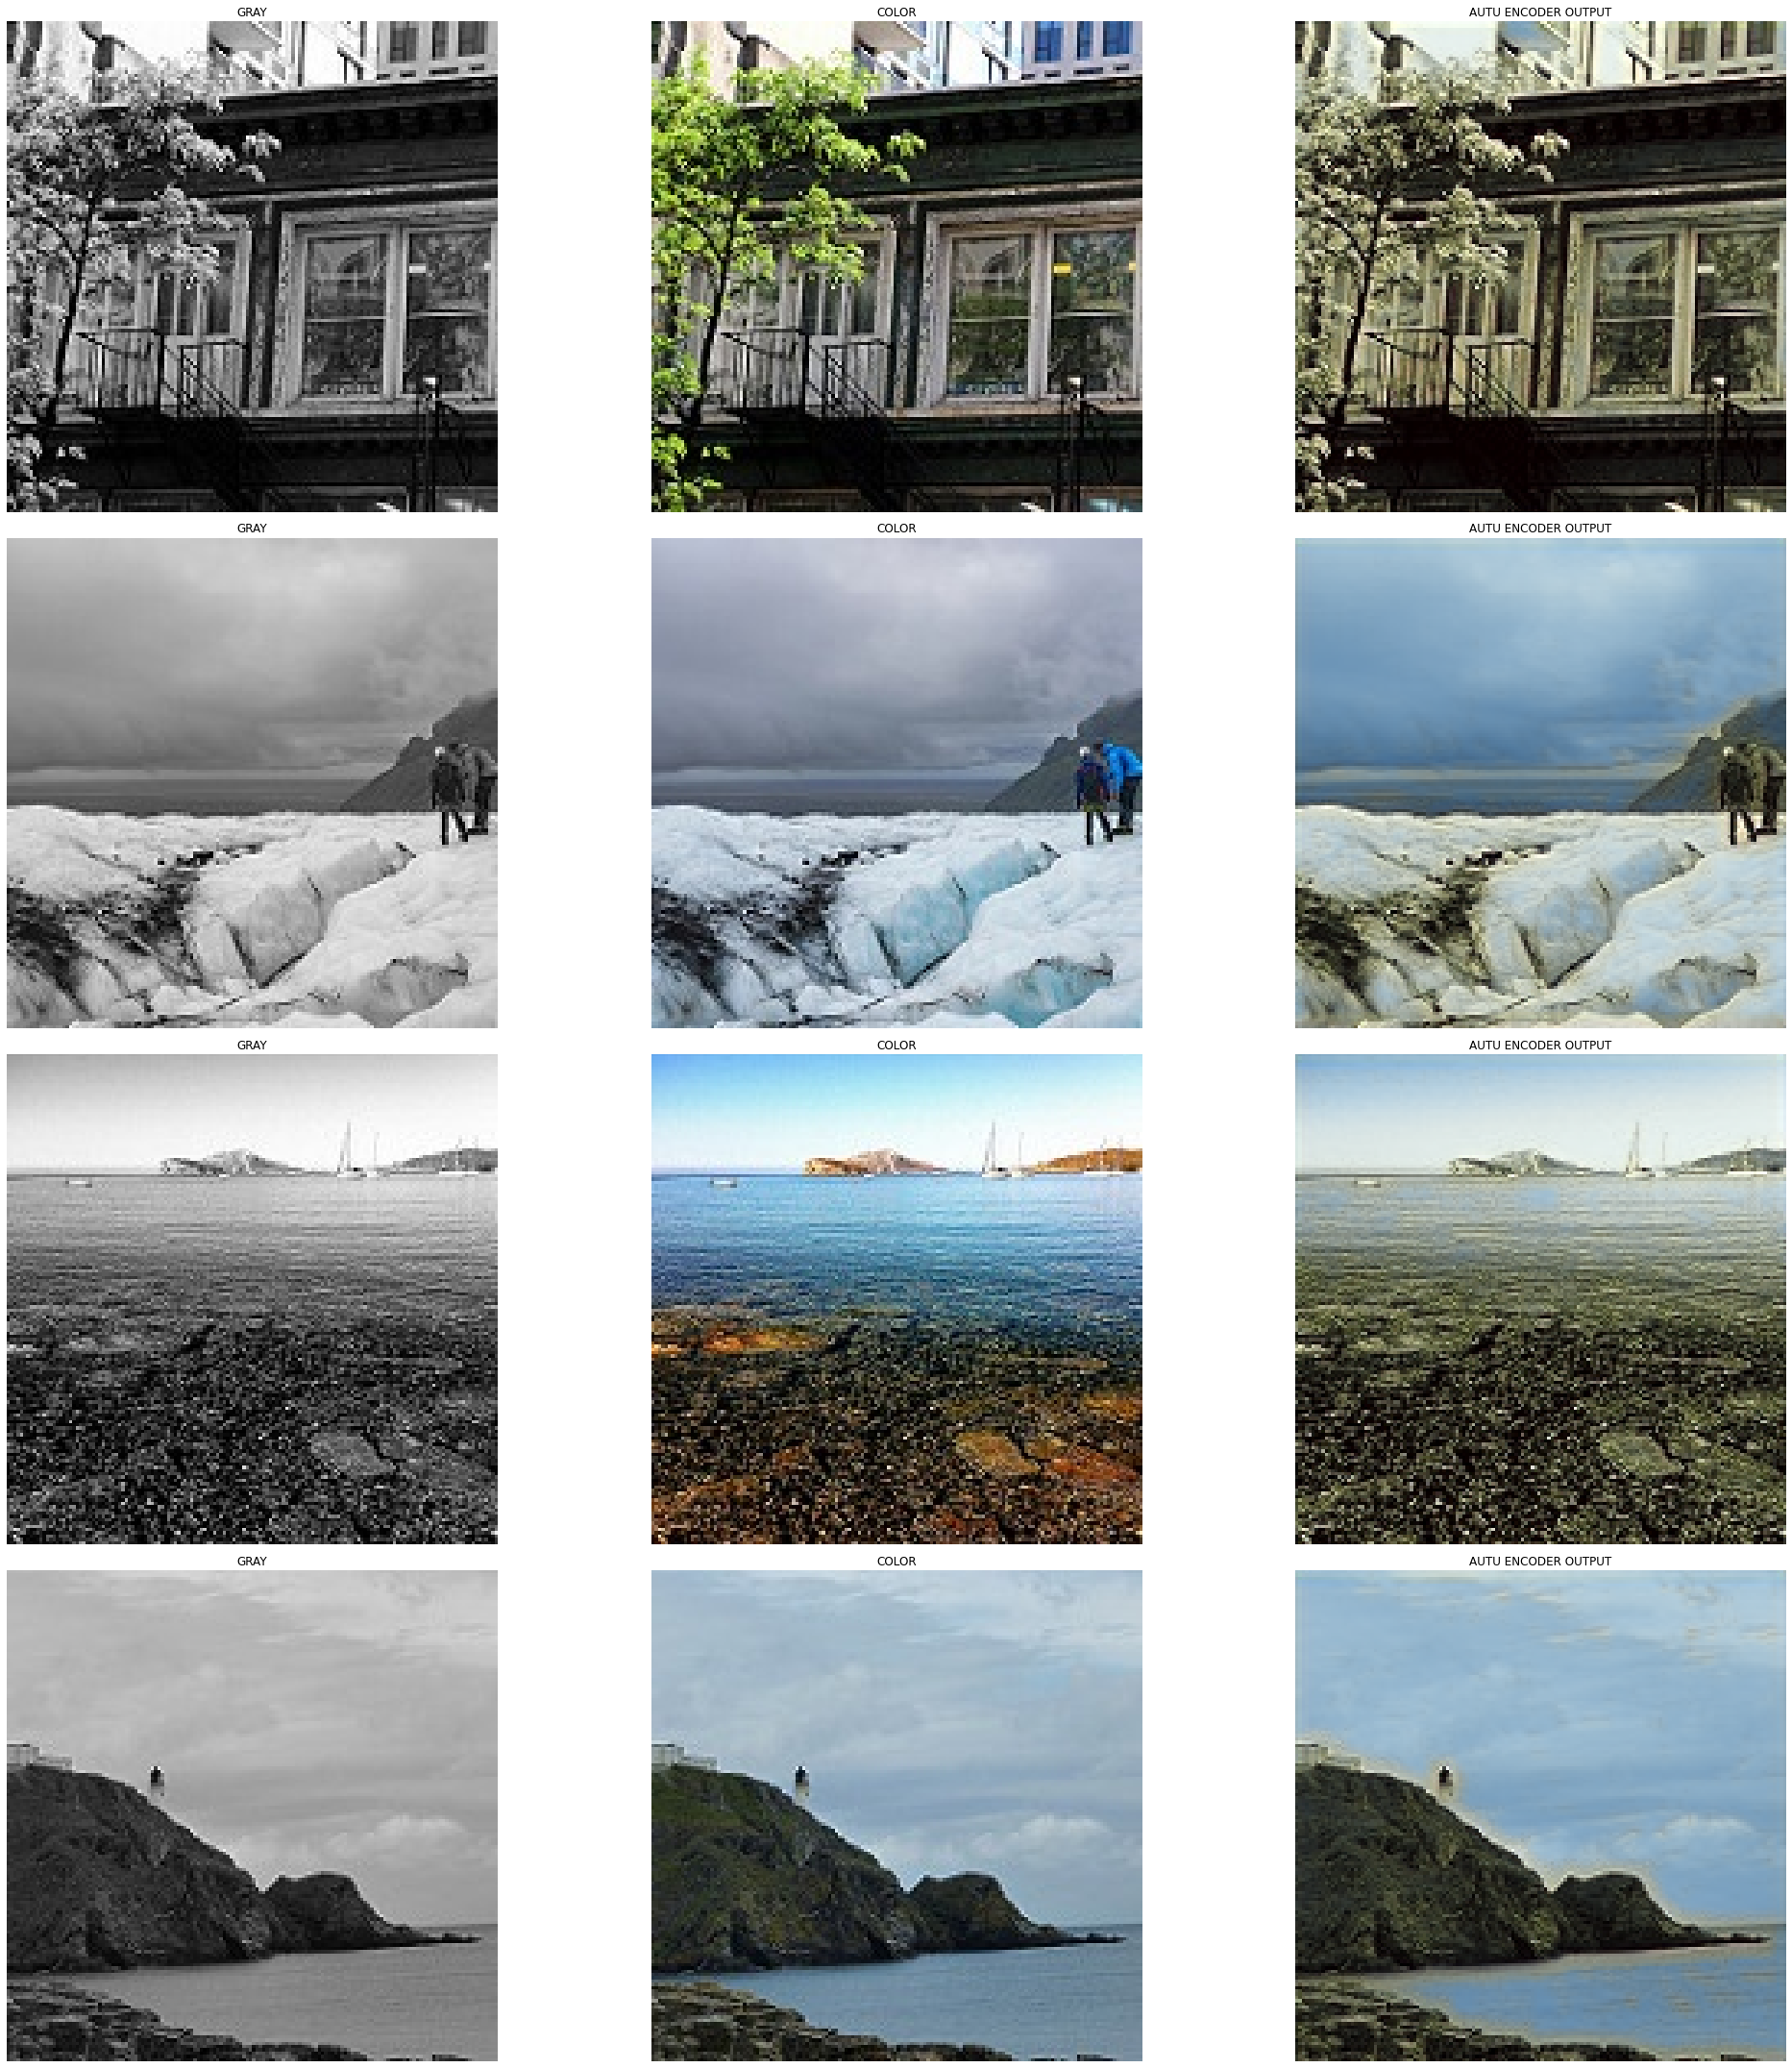

In [40]:
grayImage, colorImage = next(iter(test_data))
output = []
for i in range(grayImage.shape[0]):
    output.append(autoencoder(grayImage[i]))

fig, axs = plt.subplots(4, 3, figsize=(30,30))
for i in range(grayImage.shape[0]):
    axs[i, 0].imshow(np.transpose(grayImage[i], (1, 2, 0)))
    axs[i, 0].set_title('GRAY')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(np.transpose(colorImage[i], (1, 2, 0)))
    axs[i, 1].set_title('COLOR')
    axs[i, 1].axis('off')
    axs[i, 2].imshow(np.transpose(output[i].clone().detach(), (1, 2, 0)))
    axs[i, 2].set_title('AUTU ENCODER OUTPUT')
    axs[i, 2].axis('off')
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


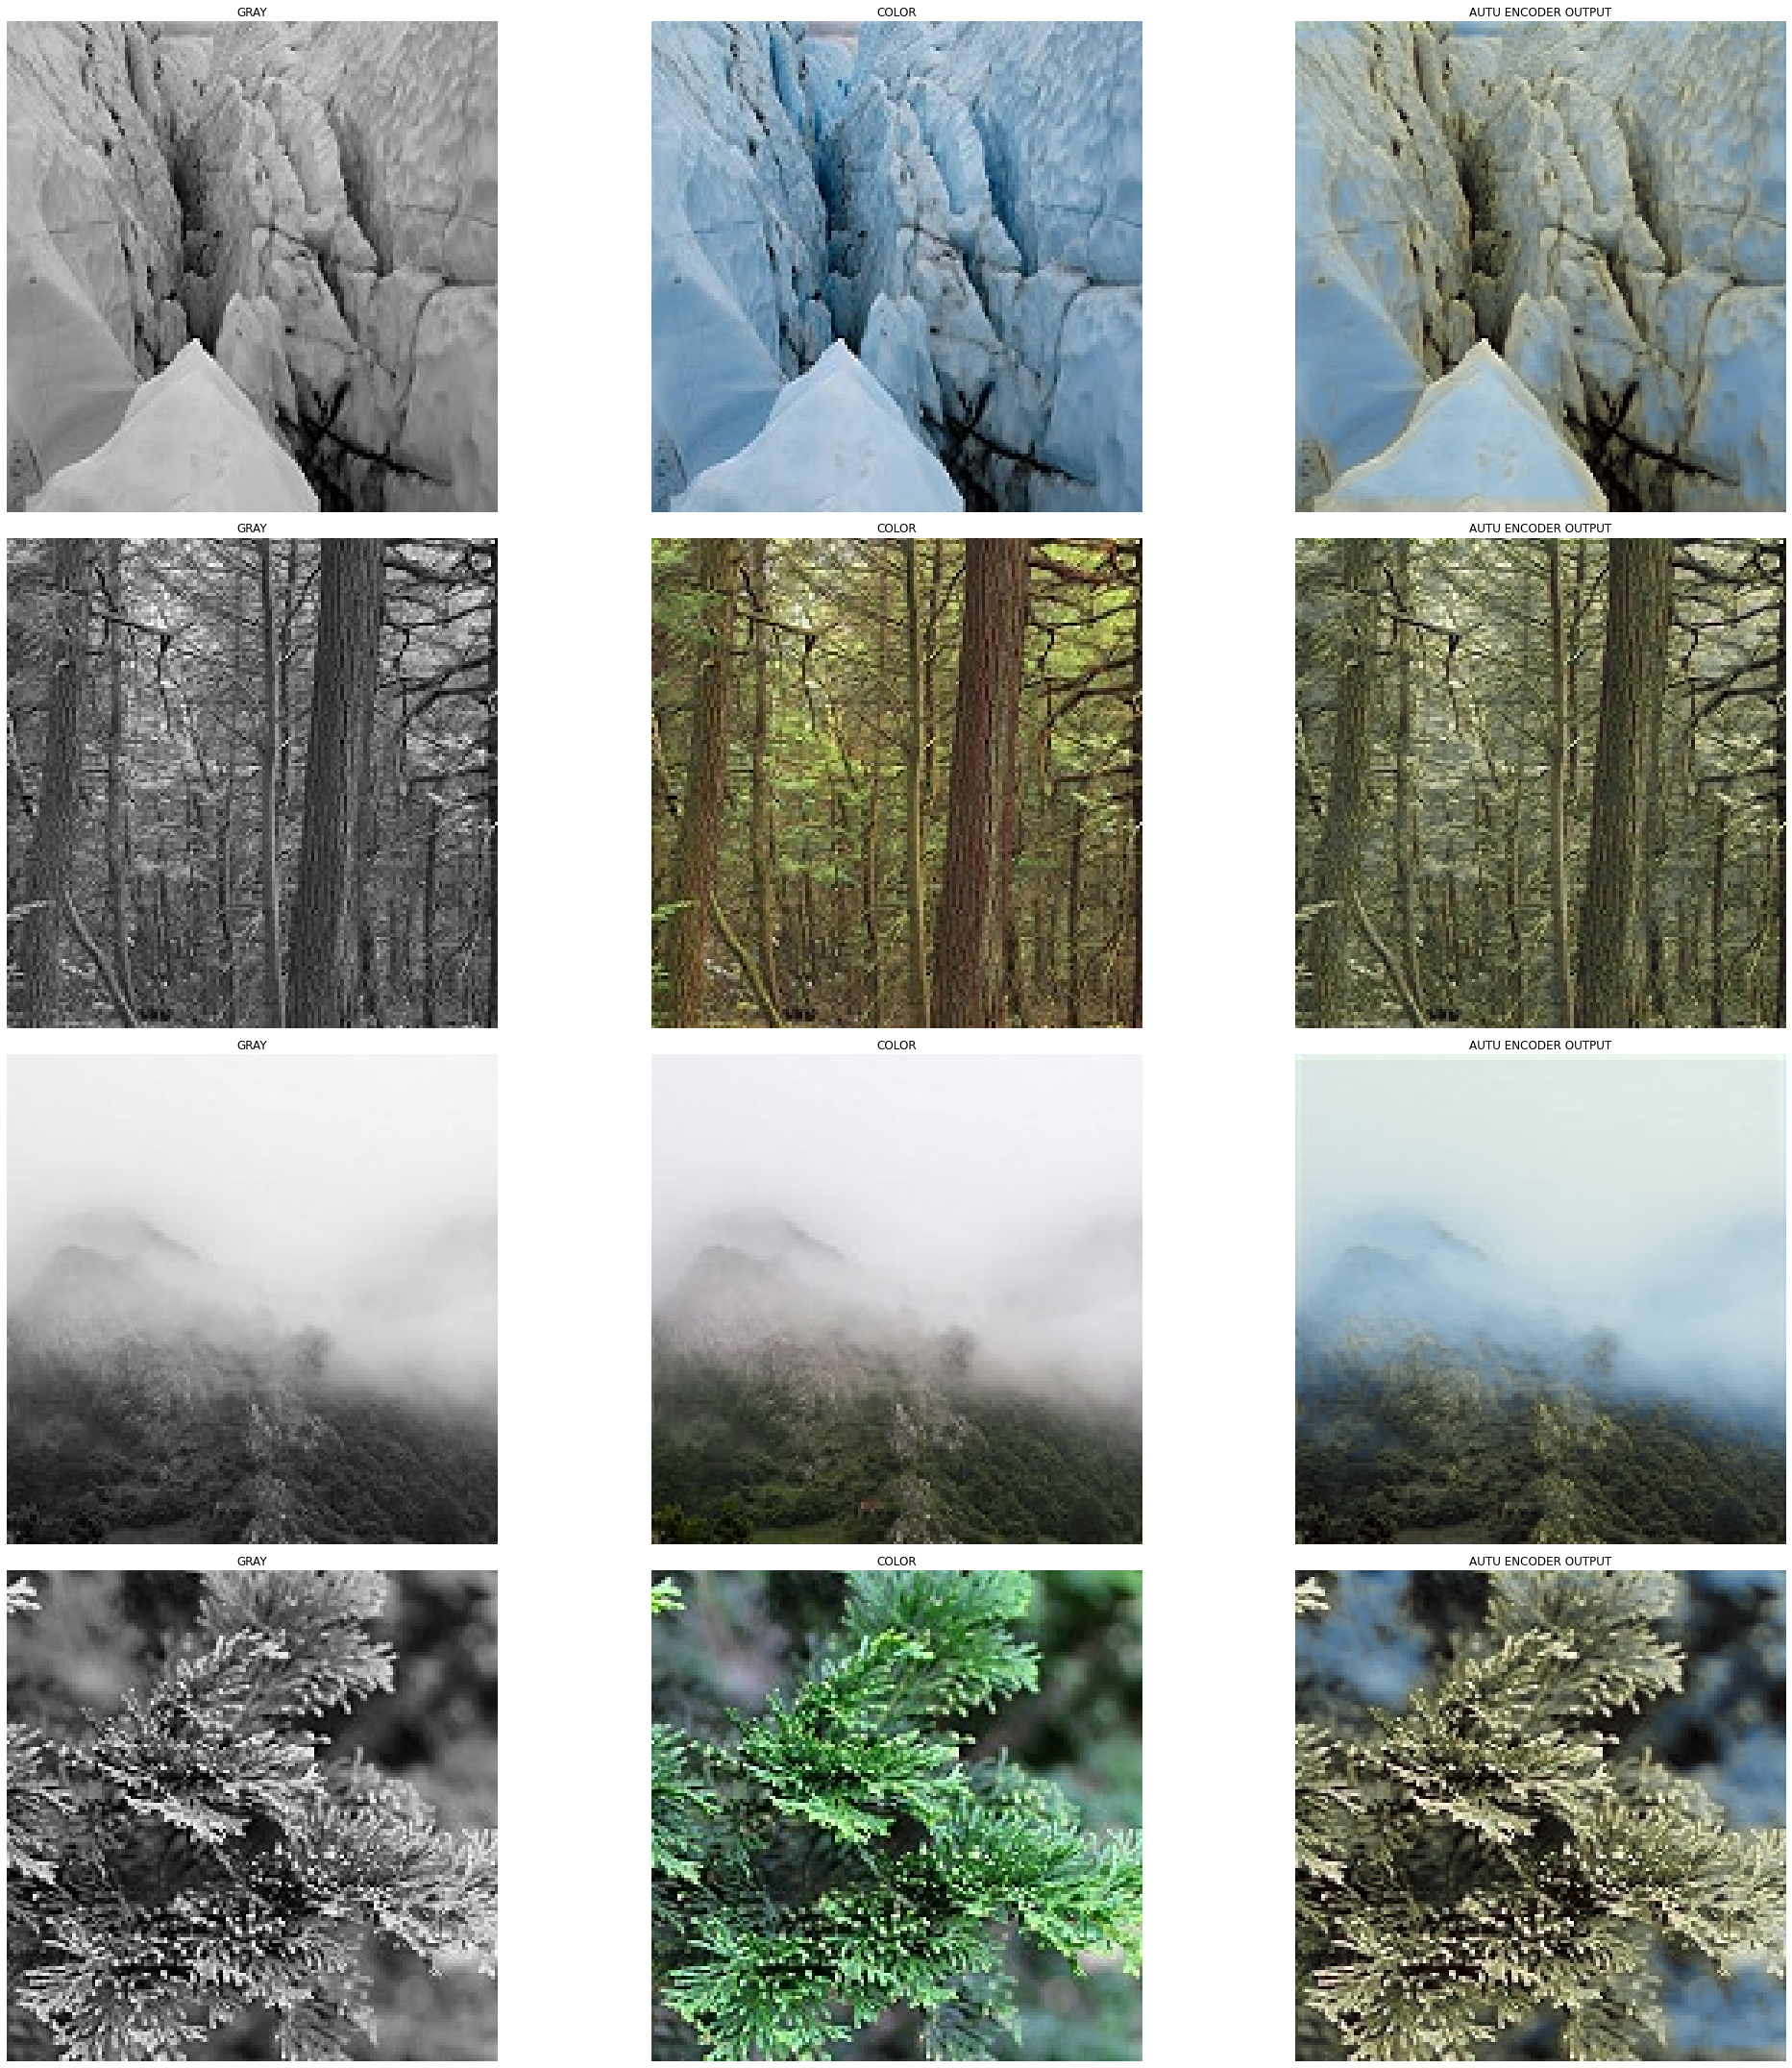

In [42]:
grayImage, colorImage = next(iter(test_data))
output = []
for i in range(grayImage.shape[0]):
    output.append(autoencoder(grayImage[i]))

fig, axs = plt.subplots(4, 3, figsize=(30,30))
for i in range(grayImage.shape[0]):
    axs[i, 0].imshow(np.transpose(grayImage[i], (1, 2, 0)))
    axs[i, 0].set_title('GRAY')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(np.transpose(colorImage[i], (1, 2, 0)))
    axs[i, 1].set_title('COLOR')
    axs[i, 1].axis('off')
    axs[i, 2].imshow(np.transpose(output[i].clone().detach(), (1, 2, 0)))
    axs[i, 2].set_title('AUTU ENCODER OUTPUT')
    axs[i, 2].axis('off')
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


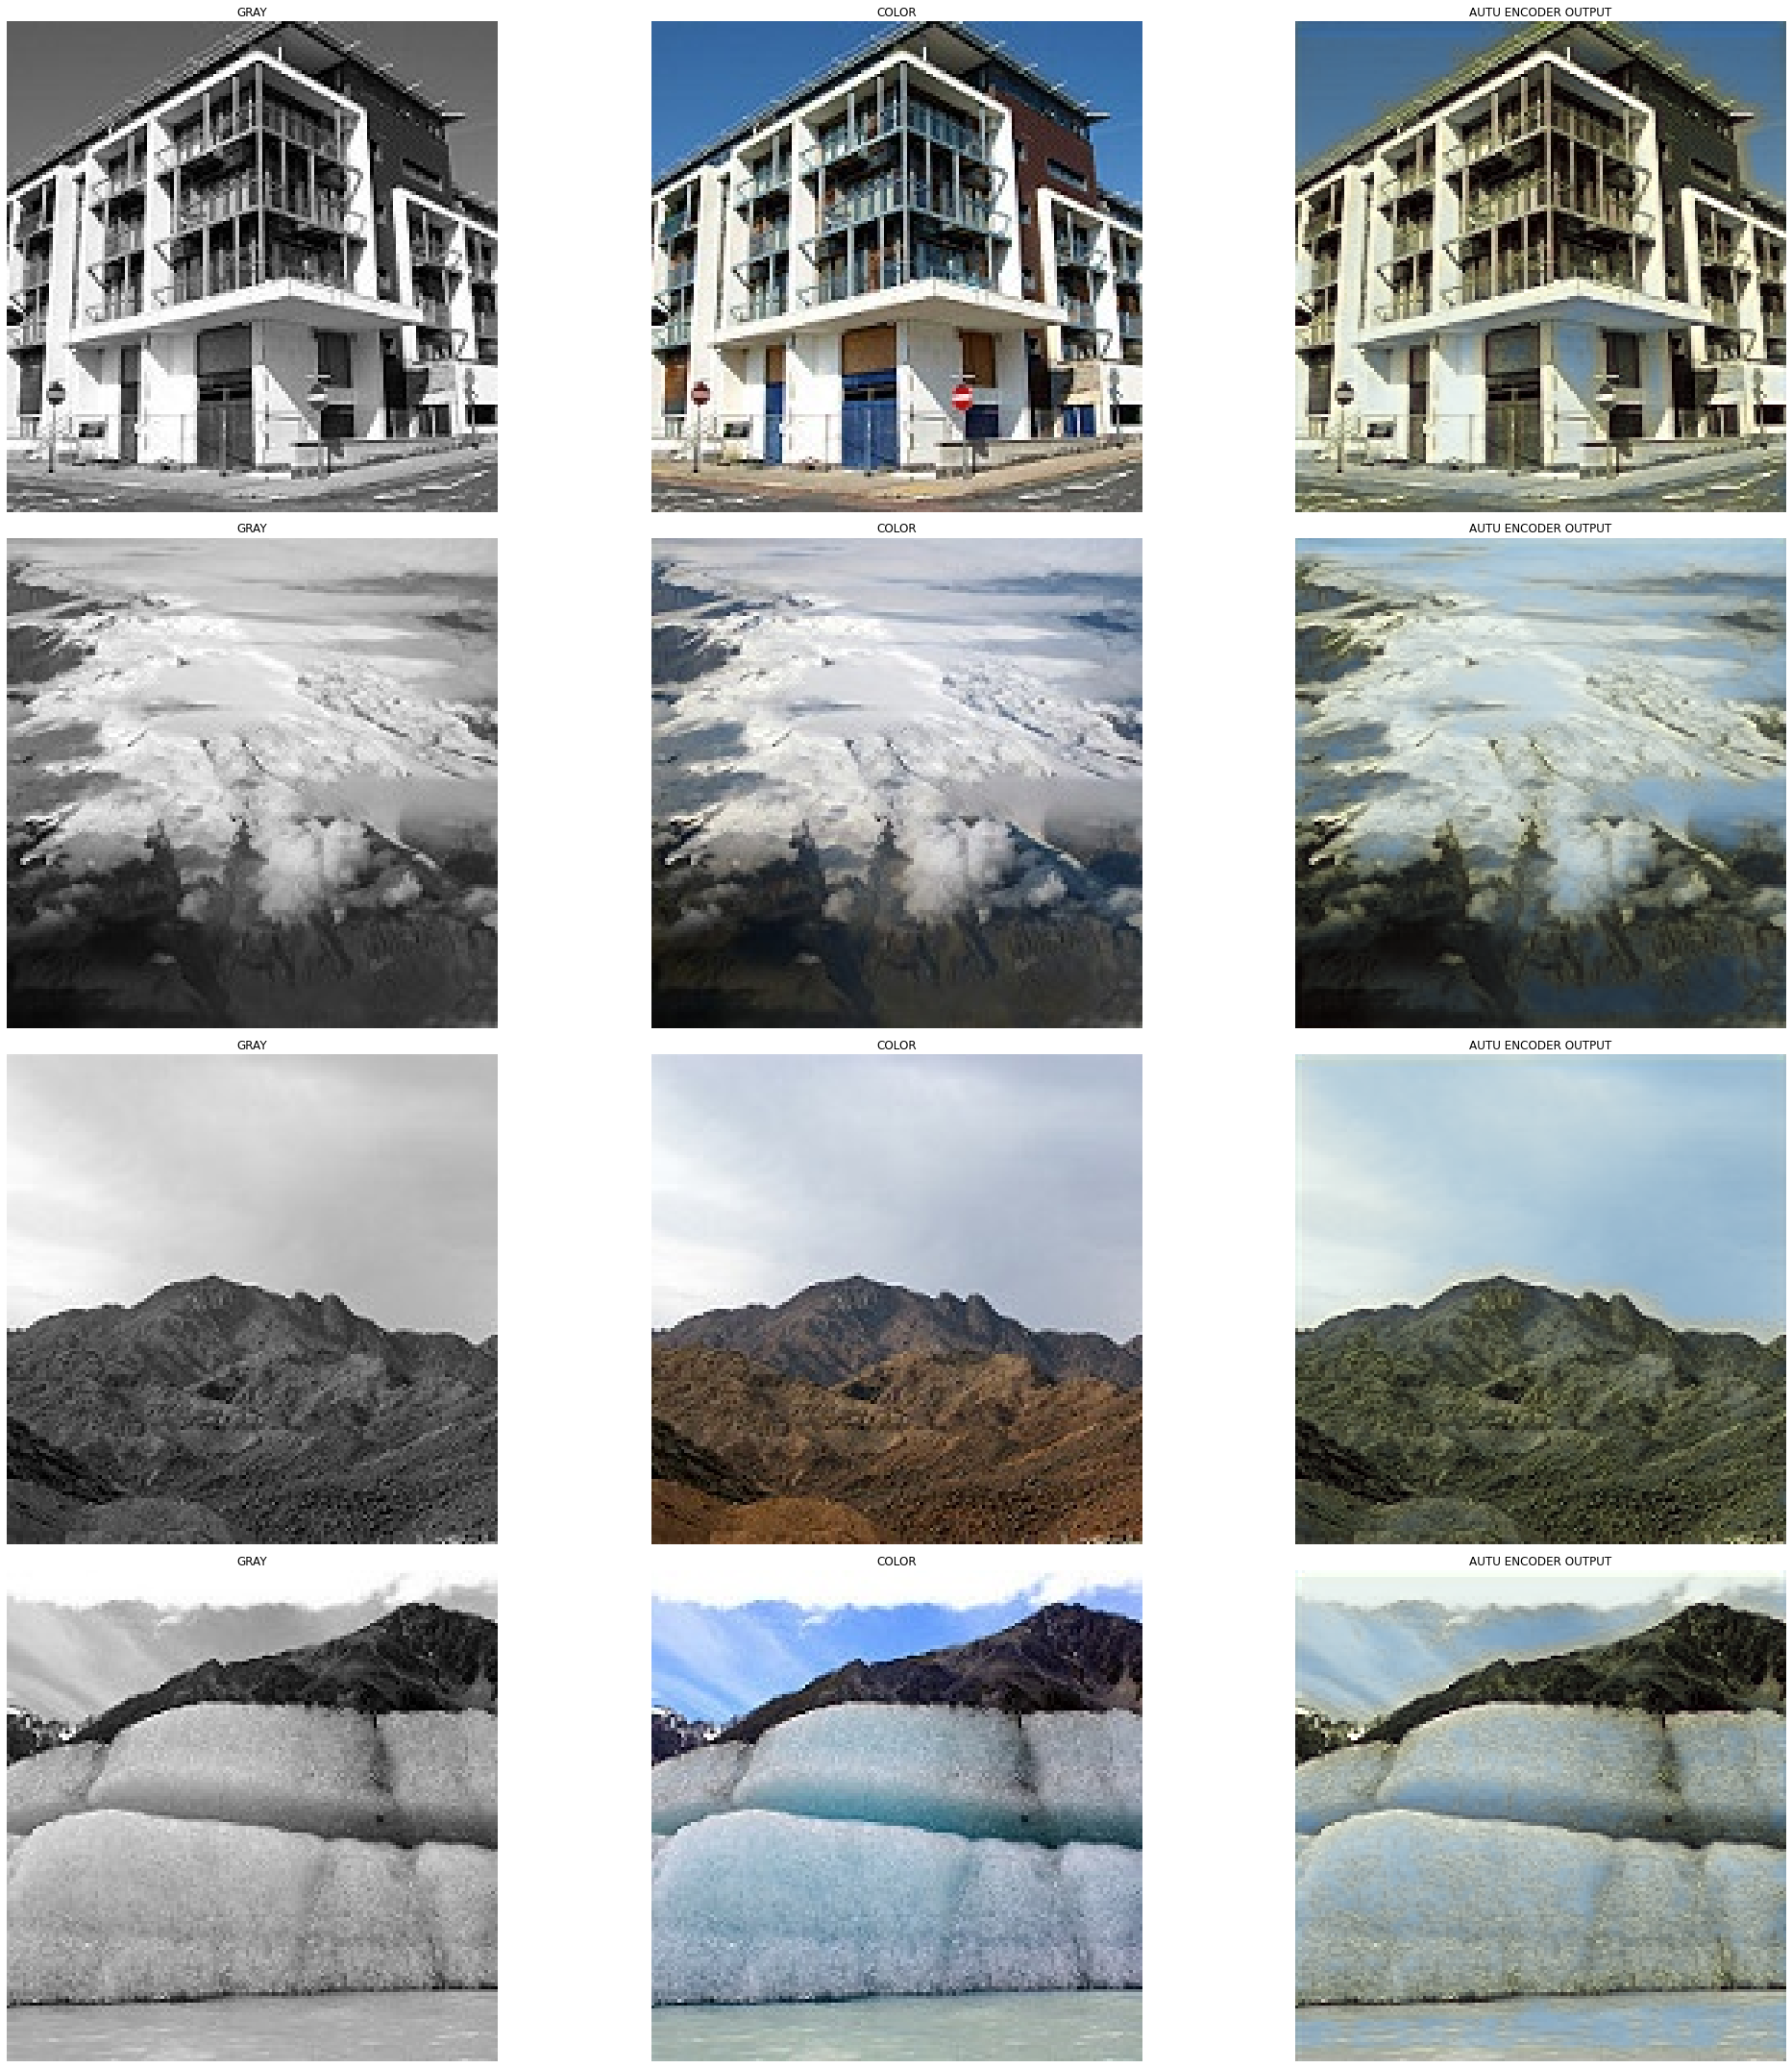

In [43]:
grayImage, colorImage = next(iter(test_data))
output = []
for i in range(grayImage.shape[0]):
    output.append(autoencoder(grayImage[i]))

fig, axs = plt.subplots(4, 3, figsize=(30,30))
for i in range(grayImage.shape[0]):
    axs[i, 0].imshow(np.transpose(grayImage[i], (1, 2, 0)))
    axs[i, 0].set_title('GRAY')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(np.transpose(colorImage[i], (1, 2, 0)))
    axs[i, 1].set_title('COLOR')
    axs[i, 1].axis('off')
    axs[i, 2].imshow(np.transpose(output[i].clone().detach(), (1, 2, 0)))
    axs[i, 2].set_title('AUTU ENCODER OUTPUT')
    axs[i, 2].axis('off')
plt.tight_layout()
plt.show()